In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let us try to predict the function h(x) or the hypothesis for a linear data first.

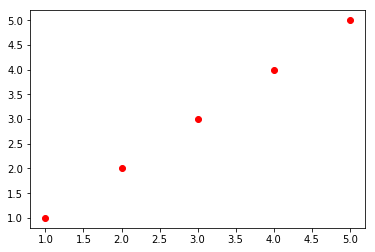

In [9]:
%matplotlib inline 
#magic command for plotting within the notebook
x = [1,2,3,4,5]
y = [1,2,3,4,5]
plt.plot(x,y, linestyle='None', marker='o', color='r')

Now let us define the gradient descent function

In [51]:
def Gradient_Descent(x, y, learning_rate, iterations):
    theta_1=np.random.randint(low=2, high=5); 
    theta_0=np.random.randint(low=2, high=5);
    m = x.shape[0]
    
    l_r = learning_rate

    #magic command to plot the graph in notebook
    %matplotlib notebook
    # to make the graph interactive
    plt.ion()

    def mean_error(a, b):
      sum_mean = 0
      for i in range(m):
        sum_mean+= a[i] - b[i]
      return sum_mean/m

    def perform_cal(theta_0,theta_1, m):
      h_xi = theta_0 + theta_1*x
      temp_0 = theta_0 - learning_rate*mean_error( h_xi, y)
      temp_1 = theta_1 - learning_rate*mean_error(h_xi*x, y*x)
      return temp_0 , temp_1

    its = iterations
    fig = plt.figure()
    ax = fig.add_subplot(111)

    for i in range(iterations):
        theta_0, theta_1 = perform_cal(theta_0, theta_1, m)
        ax.clear()
        ax.plot(x, y, linestyle='None', marker='o')
        ax.plot(x, theta_0 + theta_1*x)
        fig.canvas.draw()

    %matplotlib inline
    plt.show()

Now let us predict the linear function which will fit our test data

<IPython.core.display.Javascript object>


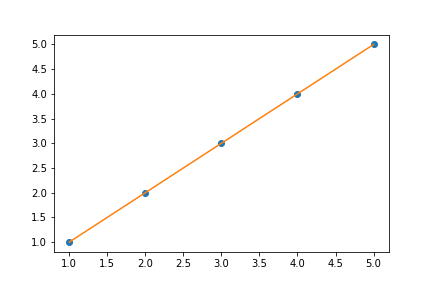

In [16]:
x = np.array(x)
y = np.array(y)
Gradient_Descent(x,y, 0.1, 500)

If you run this function on your machine, you will see a live interactive graph with the line moving to finally give this as the output.
Now let us predict a model for a polynomial test data, y= x^2.

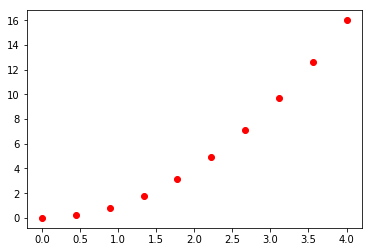

In [19]:
x2 = np.linspace(0,4,10)
y2 = x**2
plt.plot(x2,y2,linestyle='None', marker='o', color='r')
plt.show()

<IPython.core.display.Javascript object>


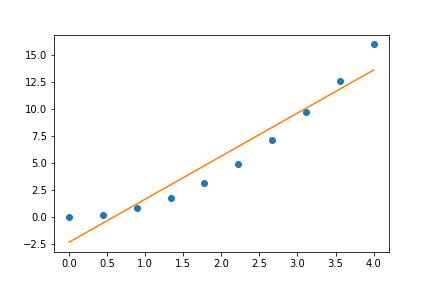

In [22]:
Gradient_Descent(x2, y2, 0.05, 500)

You would notice that I have varied the learning rate for different graphs. I would make a notebook on how to decide the range of learning rate to best fit your model. Until then you can play with it.

Now Let us predict the linear model for a random data.

<IPython.core.display.Javascript object>


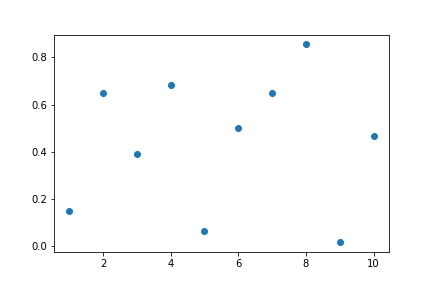

<class 'numpy.ndarray'> (10,)


In [41]:
y3 = np.random.random(10)
x3 = np.arange(1,11)
plt.plot(x3, y3, linestyle='None', marker='o')
print(type(x3), x3.shape)

Now we will do gradient Descent on this random value function.

<IPython.core.display.Javascript object>


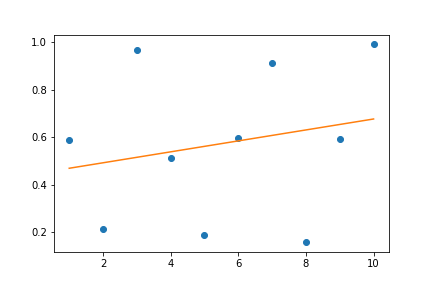

In [26]:
Gradient_Descent(x3 , y3, 0.05, 700)

To test the correction of the function, let us comapare it to a model predicted by a pre-written function in seaborn library.

In [27]:
import seaborn as sns
import pandas as pd
data1 = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data1.head(5)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


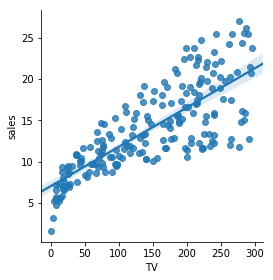

In [29]:
sns.pairplot(data1, x_vars=['TV'], y_vars='sales', size=4, aspect=1, kind='reg')

So above is the model predicted by the function. Let us run it on our own function.

In [35]:
x4 = data1.TV
y4 = data1.sales
print(type(x4))
print(type(y4))
print(x4.head(5))
print(y4.head(5))
print(x4.shape)
print(y4.shape)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
1    230.1
2     44.5
3     17.2
4    151.5
5    180.8
Name: TV, dtype: float64
1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64
(200,)
(200,)


<IPython.core.display.Javascript object>


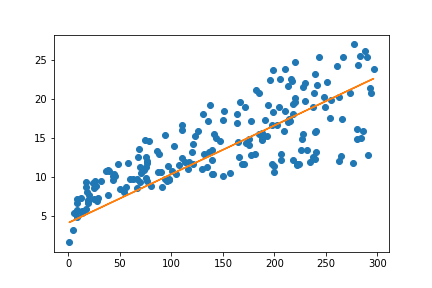

In [61]:
x4 = np.array(x4)  #converting pandas Series to numpy array
y4 = np.array(y4)
Gradient_Descent(x4, y4, 0.000068, 2000)

And this worked finally. When I implemented it for the first time I implemented with a very high learning rate which gave me wrong results. Then I lowered the learning rate to get correct results.
When you run this in your browser you will see rapidly vibrating lines.

In fact the problem that I faced was a very common problem encountered. Hence I will make a  notebook on best practices to decide alpha for gradient design.